In [2]:
from src.utils import *

In [3]:
measures = ['rand', 'ari', 'nmi', 'v_score']
measures_labels = ['RI', 'ARI', 'NMI', 'v-score']

# Meneame

## Synthetic networks

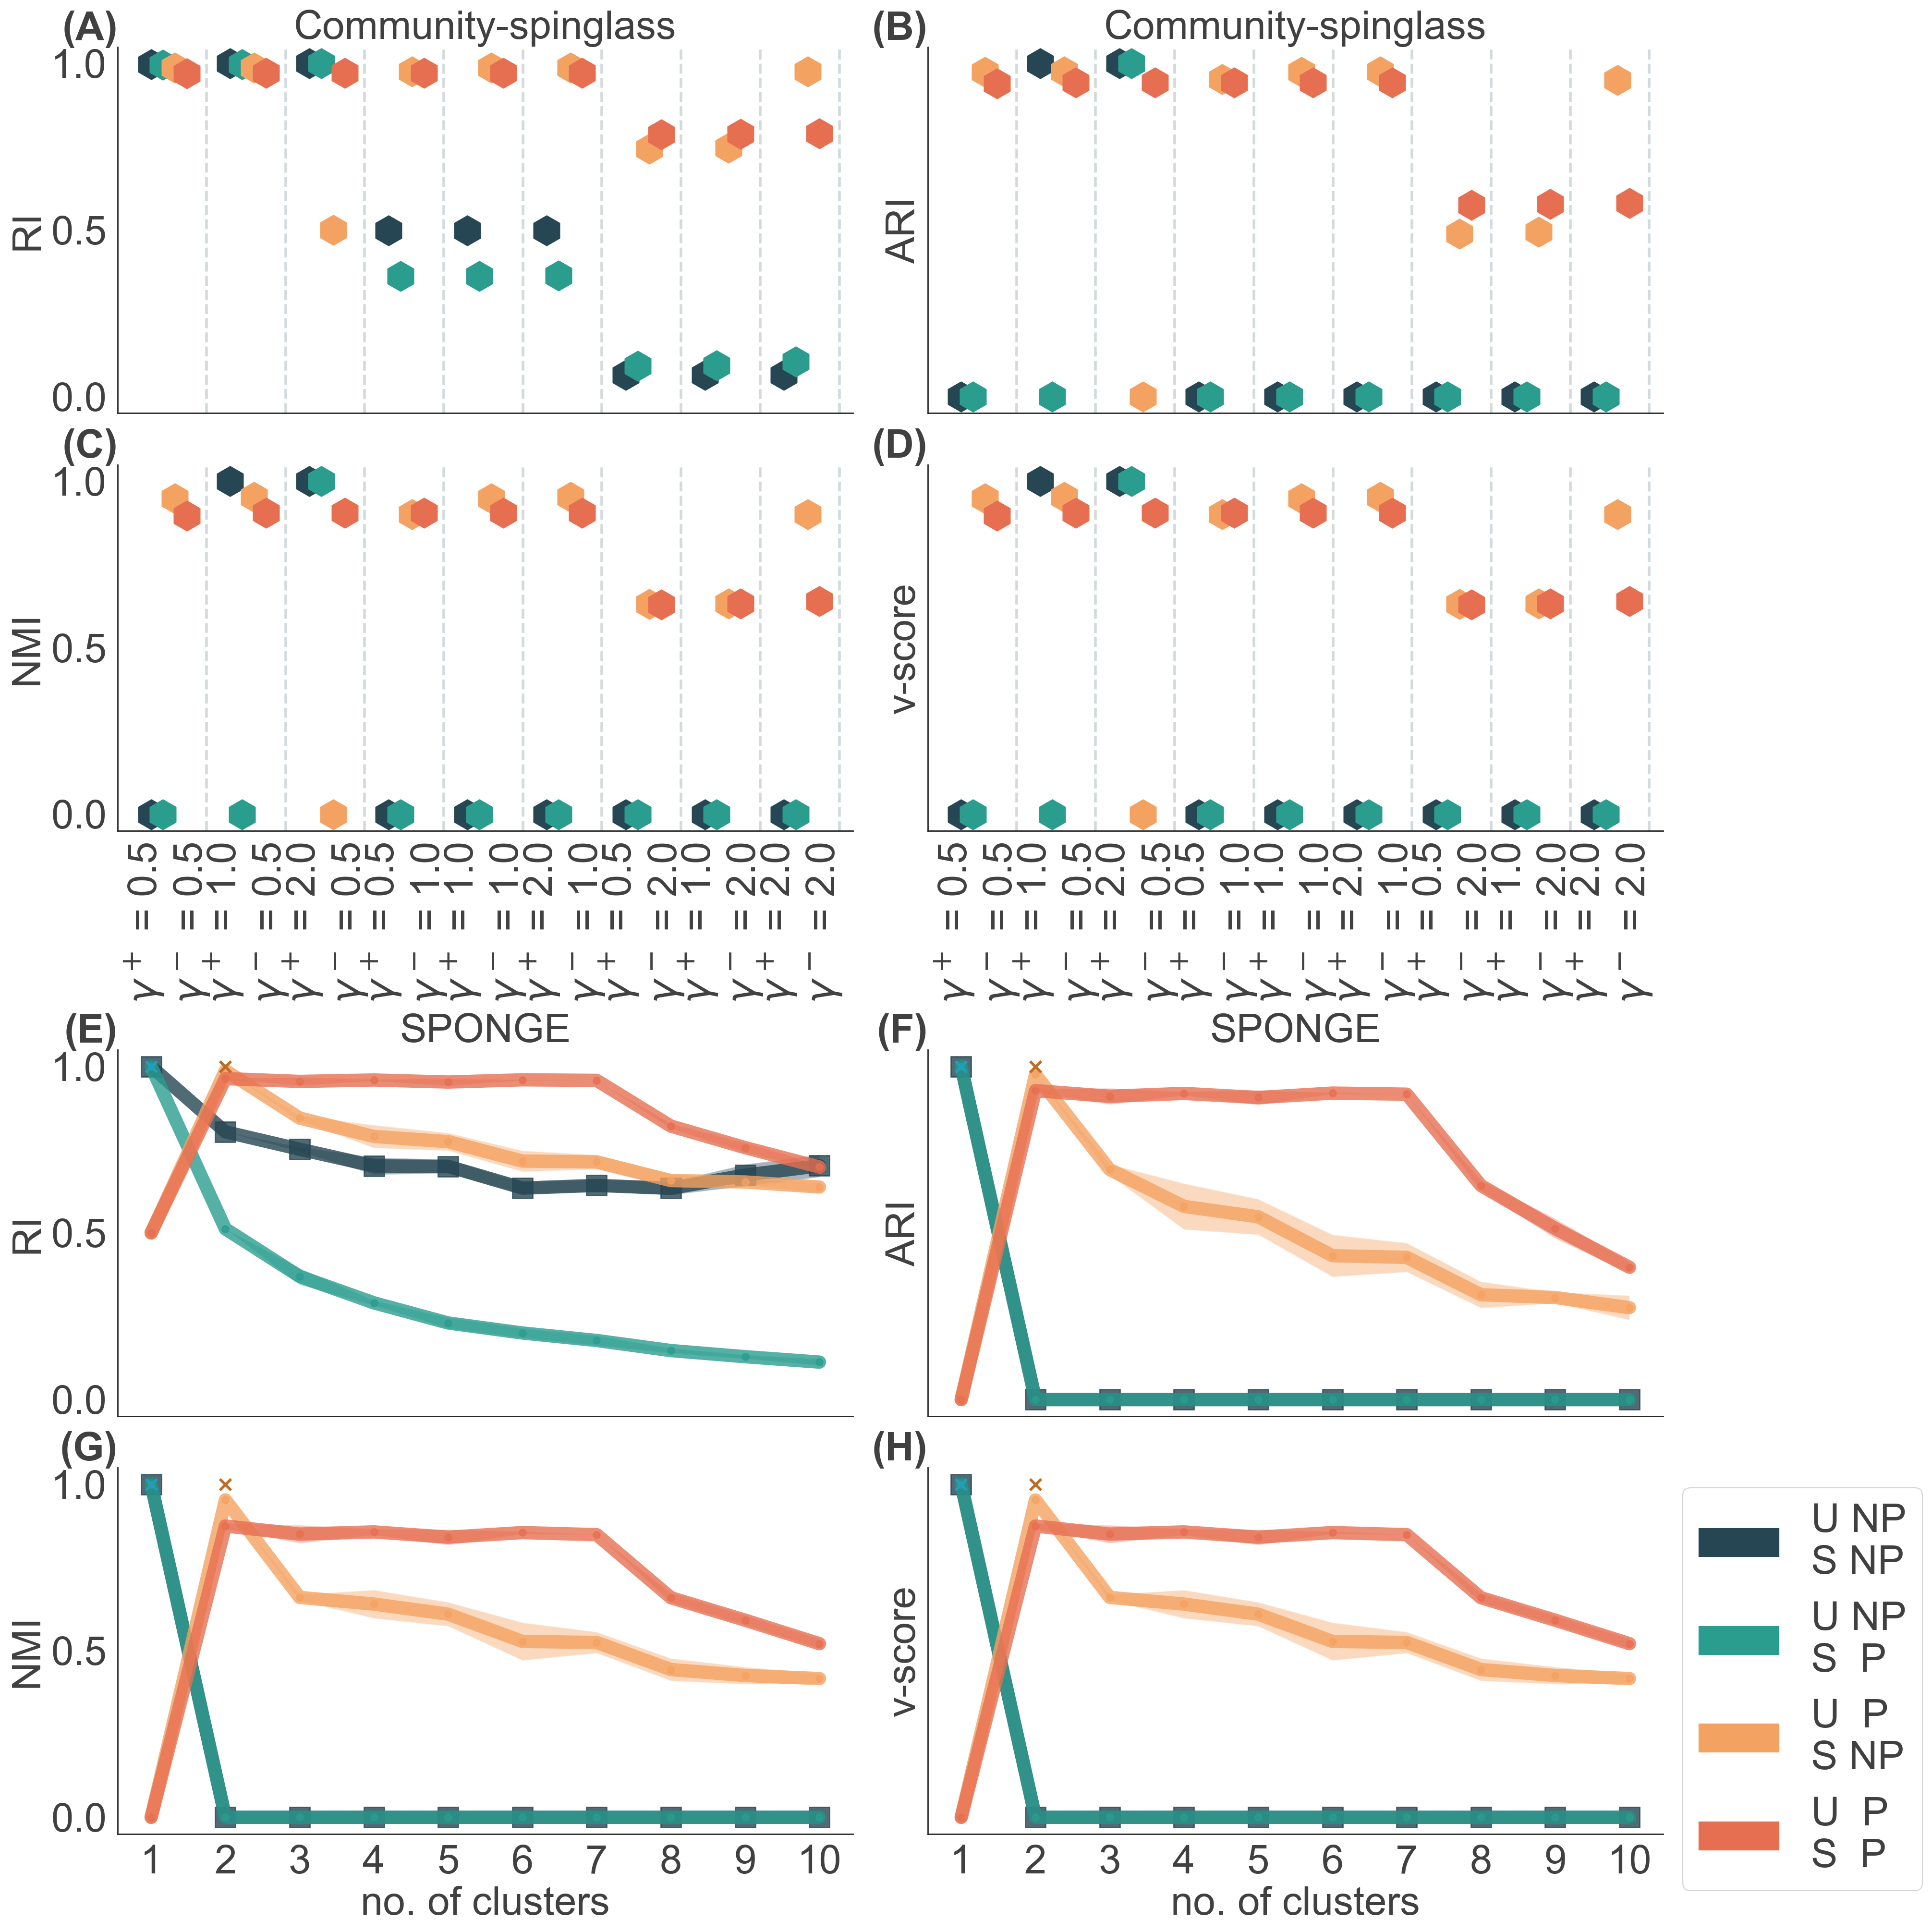

In [4]:
gammas = [0.5, 1, 2]
lambdas = [0.5, 1, 2]

mats, labels = load_data('./data/meneame/synth/uniform/')
fig, axs = plt.subplots(4, 2, figsize = (20,20),dpi =200, sharey=True, constrained_layout=True)

# Define panel letters
panel_labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']

# Add panel letters to subplots
for i, ax in enumerate(axs.ravel()):
    ax.text(0, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')

j = 0
for m, ax in zip(measures+measures, axs.ravel()):
    if j < 4:
        dfs = rand_score_df(method='spinglass',dataset='meneame',mats= mats, labels=labels, scenarios=uniform_scenarios,synth=True, metrics=m)

        if j == 0 or j == 1:  
            ax.set_title(f'Community-spinglass', size = text_size)
            plot_spinglass_synth(ax, dfs[::2], lambdas, gammas, titles, text_size, xticks = False)
            
        else:
            plot_spinglass_synth(ax, dfs[::2], lambdas, gammas, titles, text_size, xticks = True)
        ax.set_ylabel((measures_labels*2)[j], size =text_size)
        ax.tick_params(axis='both', labelsize=text_size)
        j+=1
    elif j >= 4  and  j <8:
        df, df_std = rand_score_df(method='sponge',dataset='meneame',mats= mats, scenarios=uniform_scenarios,labels=labels,synth=True, metrics=m)
        if j == 4 or j == 5:
            ax.set_title(f'SPONGE', size = text_size)
            plot_sponge_synth(ax, df, df_std, text_size, titles, xticks=False)
        else:
            plot_sponge_synth(ax, df, df_std, text_size, titles, xticks=True)
        ax.set_ylabel((measures_labels*2)[j], fontsize =text_size)
        j+=1
        '''
    elif j >= 8  and  j <12:
        df = rand_score_df(method='sbm',dataset='meneame',mats= mats, scenarios=uniform_scenarios,labels=labels,synth=True, metrics=m)
        if j == 8 or j == 9:
            ax.set_title(f'SBM', size = text_size)
            plot_sbm_synth(ax, df, text_size, titles, xticks=False)
        else:
            plot_sbm_synth(ax, df, text_size, titles, xticks=True)
        ax.set_ylabel((measures_labels*3)[j], fontsize =text_size)
        j+=1
        '''
    #ax.tick_params(axis='both', labelsize=text_size)


save_plot(path = './plots/uniform/', filename = 'metrics_comparison.pdf')
plt.show()

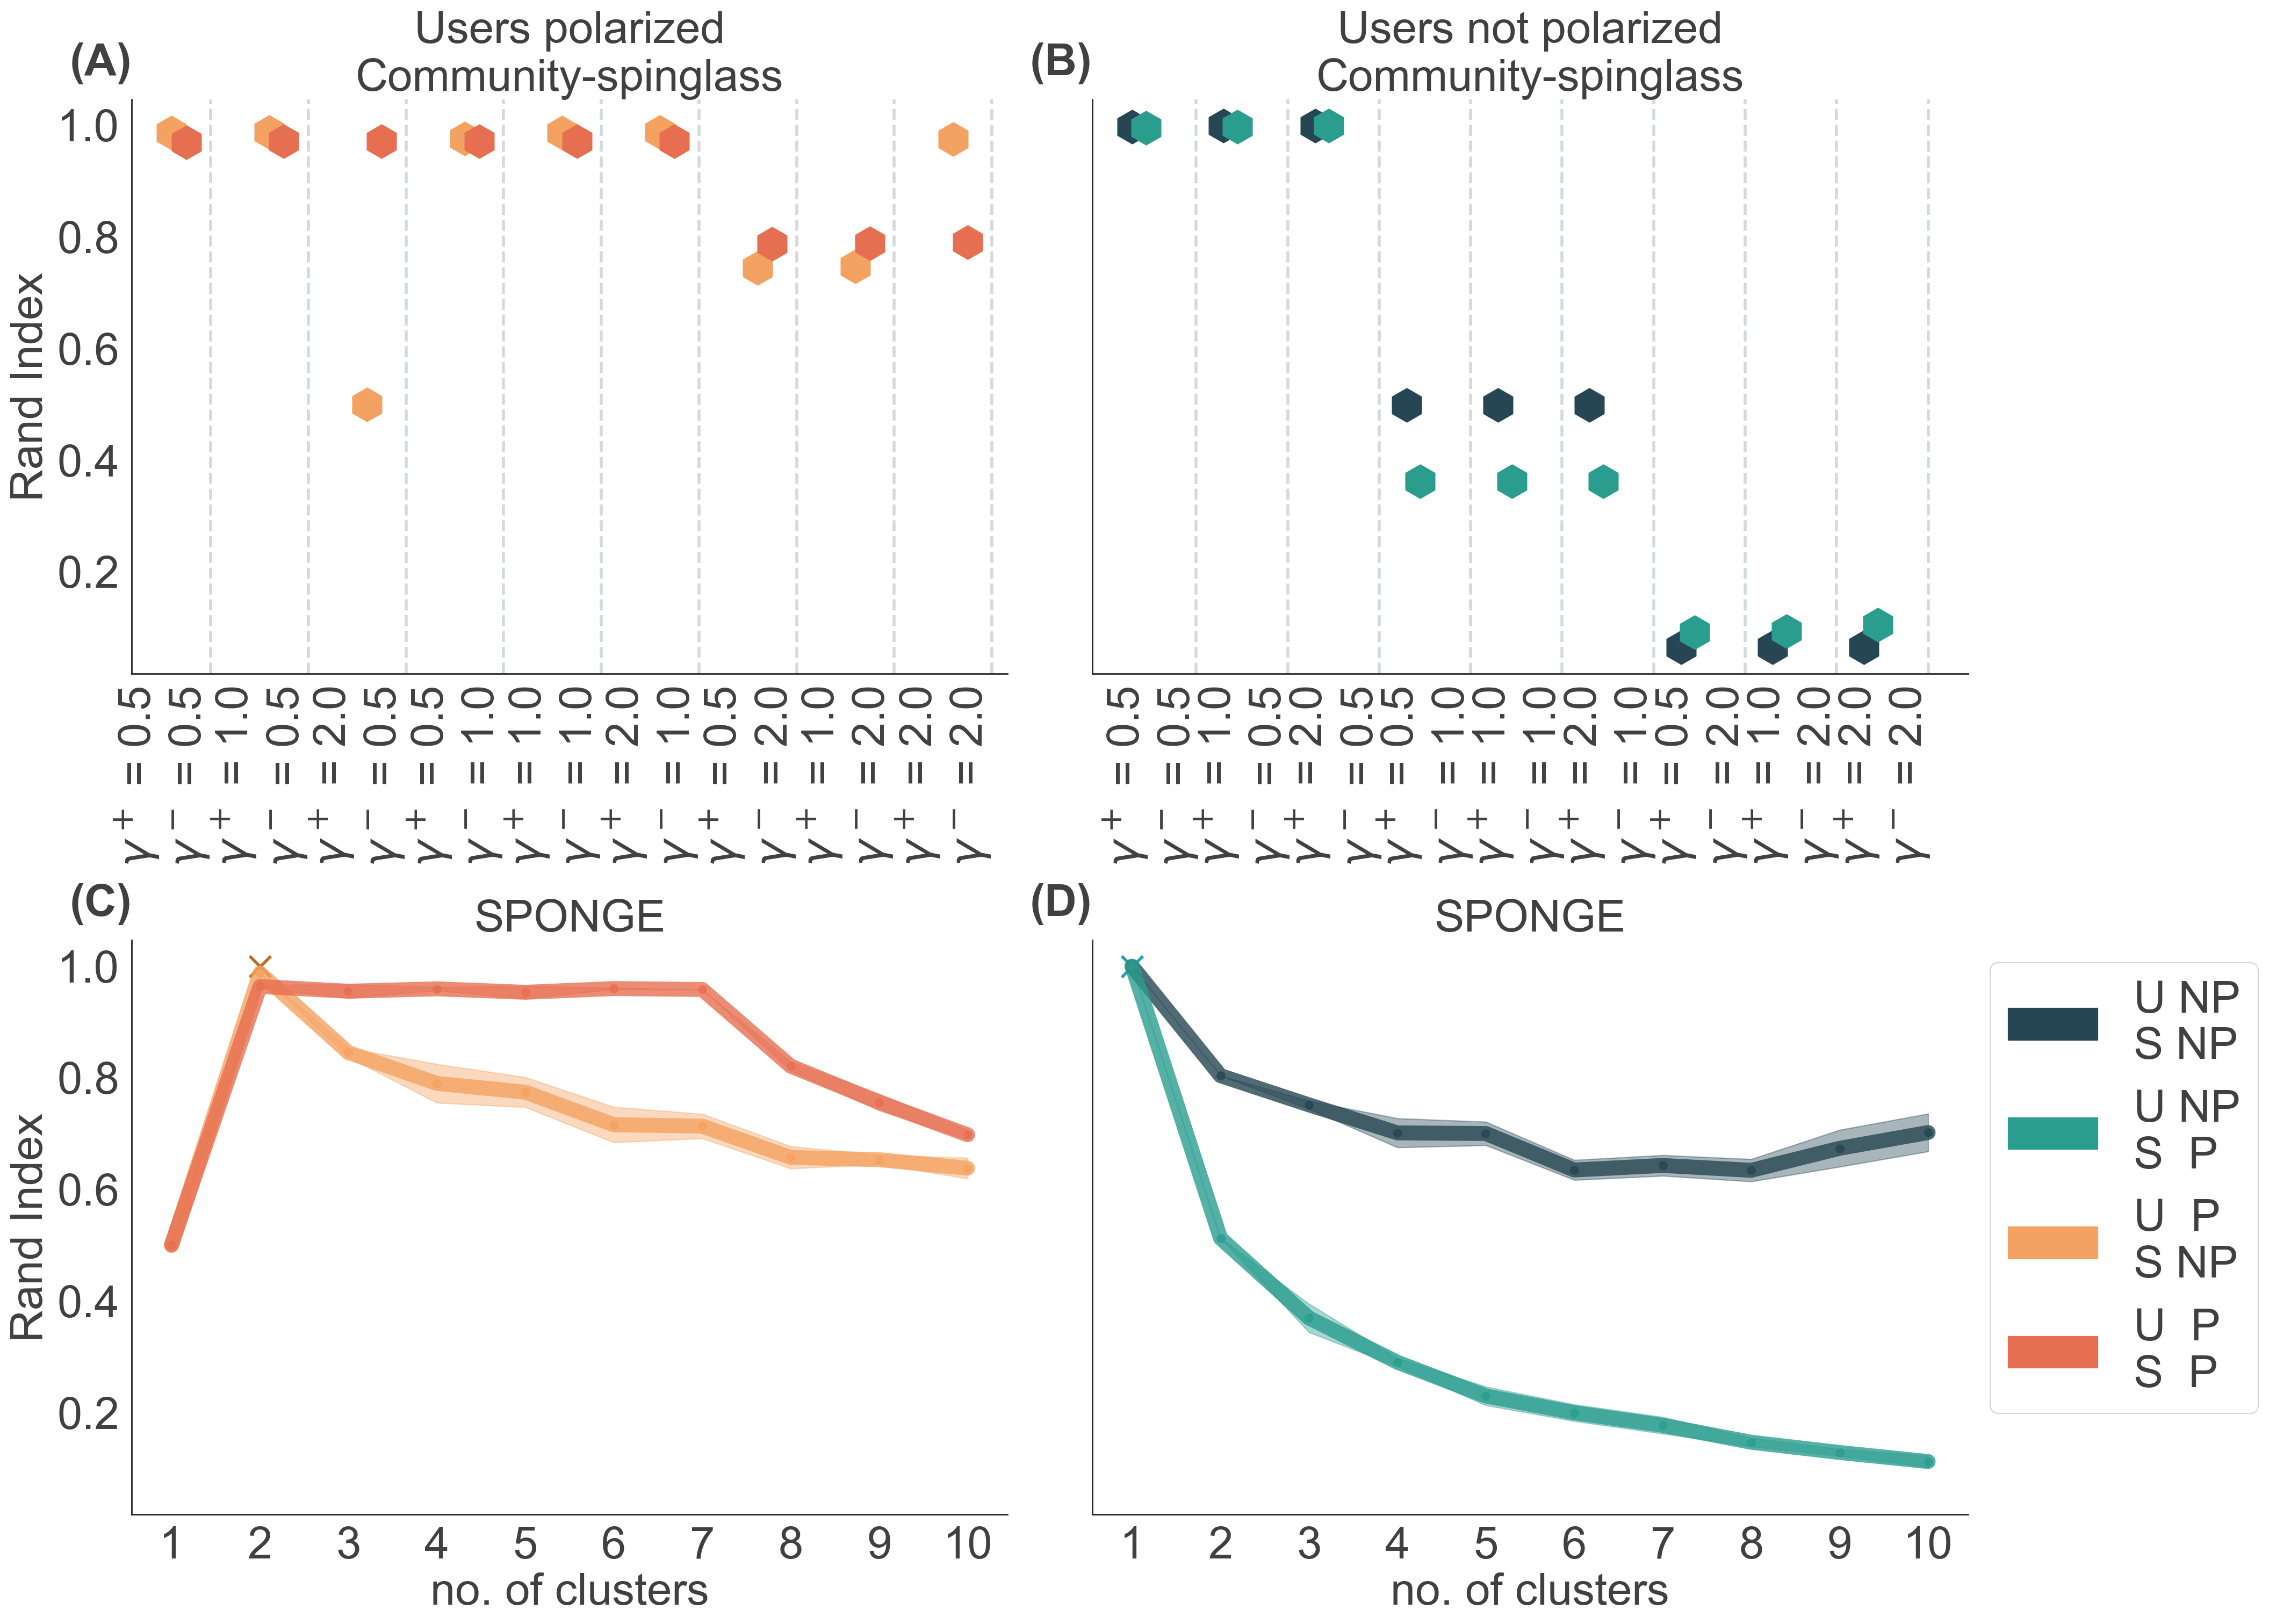

In [5]:
gammas = [0.5, 1, 2]
lambdas = [0.5, 1, 2]

mats, labels = load_data('./data/meneame/synth/uniform/')
fig, axes = plt.subplots(2, 2, figsize = (21,15), dpi = 200, sharey=True, constrained_layout=True)
ax1, ax2, ax3, ax4 = axes.flatten()


# Define panel letters
panel_labels = ['(A)', '(B)', '(C)', '(D)']

# Add panel letters to subplots
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.text(0, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')


dfs = rand_score_df(method='spinglass',dataset='meneame',mats= mats, labels=labels, scenarios=uniform_scenarios, synth=True, metrics='rand')

ax1.set_title(f'Users polarized\nCommunity-spinglass', size = text_size)     
ax2.set_title(f'Users not polarized\nCommunity-spinglass', size = text_size)

plot_spinglass_synth_split(ax2,ax1, dfs[::2], lambdas, gammas, titles, text_size, xticks = True)

ax1.set_ylabel('Rand Index', size =text_size)


df, df_std = rand_score_df(method='sponge',dataset='meneame',mats= mats, labels=labels, scenarios=uniform_scenarios,synth=True, metrics='rand')

ax3.set_title(f'SPONGE', size = text_size)
ax4.set_title(f'SPONGE', size = text_size)
plot_sponge_synth_split(ax4,ax3, df, df_std, text_size, titles, xticks=True)

ax3.set_ylabel('Rand Index', size =text_size)

save_plot(path = './plots/uniform/', filename = 'metrics_comparison_red.pdf')
plt.show()

### Degree corrected

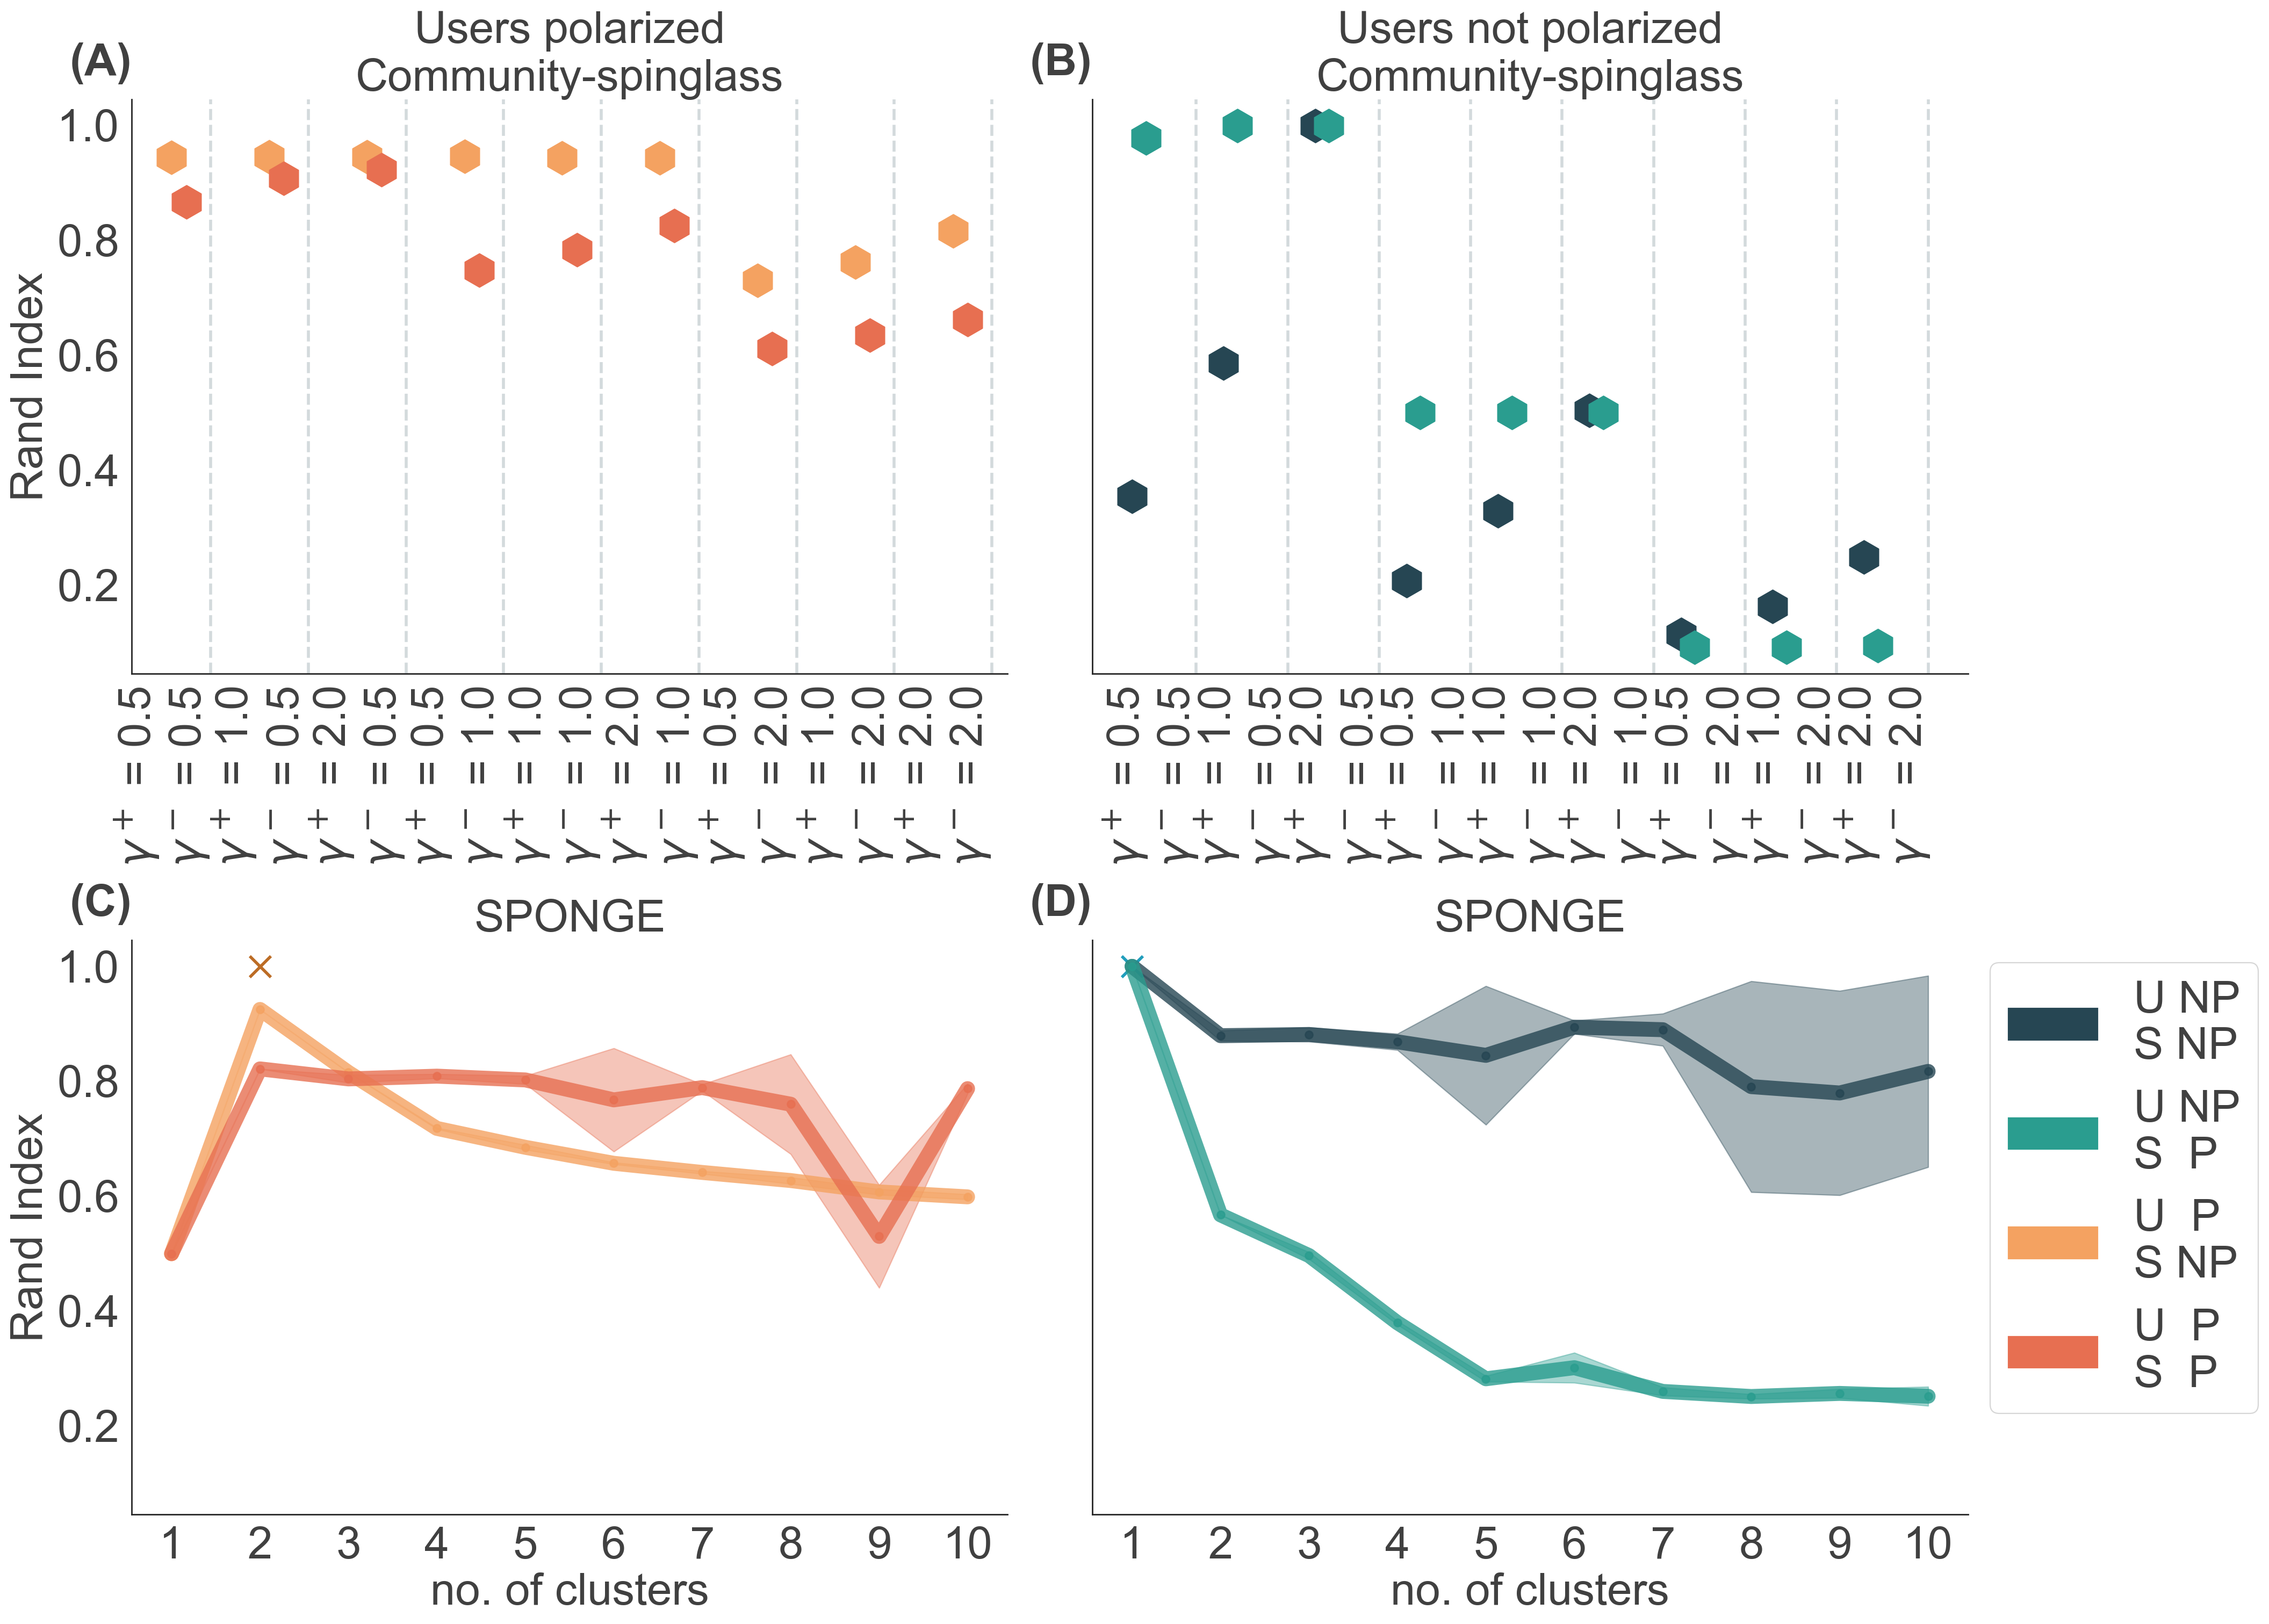

In [6]:
gammas = [0.5, 1, 2]
lambdas = [0.5, 1, 2]

mats, labels = load_data('./data/meneame/synth/deg_corr/')
fig, axes = plt.subplots(2, 2, figsize = (21,15), dpi = 200, sharey=True, constrained_layout=True)
ax1, ax2, ax3, ax4 = axes.flatten()


# Define panel letters
panel_labels = ['(A)', '(B)', '(C)', '(D)']

# Add panel letters to subplots
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.text(0, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')


dfs = rand_score_df(method='spinglass',dataset='meneame',mats= mats, labels=labels, scenarios=deg_corr_scenarios, synth=True, metrics='rand')

ax1.set_title(f'Users polarized\nCommunity-spinglass', size = text_size)     
ax2.set_title(f'Users not polarized\nCommunity-spinglass', size = text_size)

plot_spinglass_synth_split(ax2,ax1, dfs[::2], lambdas, gammas, titles, text_size, xticks = True)

ax1.set_ylabel('Rand Index', size =text_size)


df, df_std = rand_score_df(method='sponge',dataset='meneame',mats= mats, labels=labels, scenarios=deg_corr_scenarios,synth=True, metrics='rand')

ax3.set_title(f'SPONGE', size = text_size)
ax4.set_title(f'SPONGE', size = text_size)
plot_sponge_synth_split(ax4,ax3, df, df_std, text_size, titles, xticks=True)

ax3.set_ylabel('Rand Index', size =text_size)

save_plot(path = './plots/deg_corr/', filename = 'metrics_comparison_red.pdf')
plt.show()

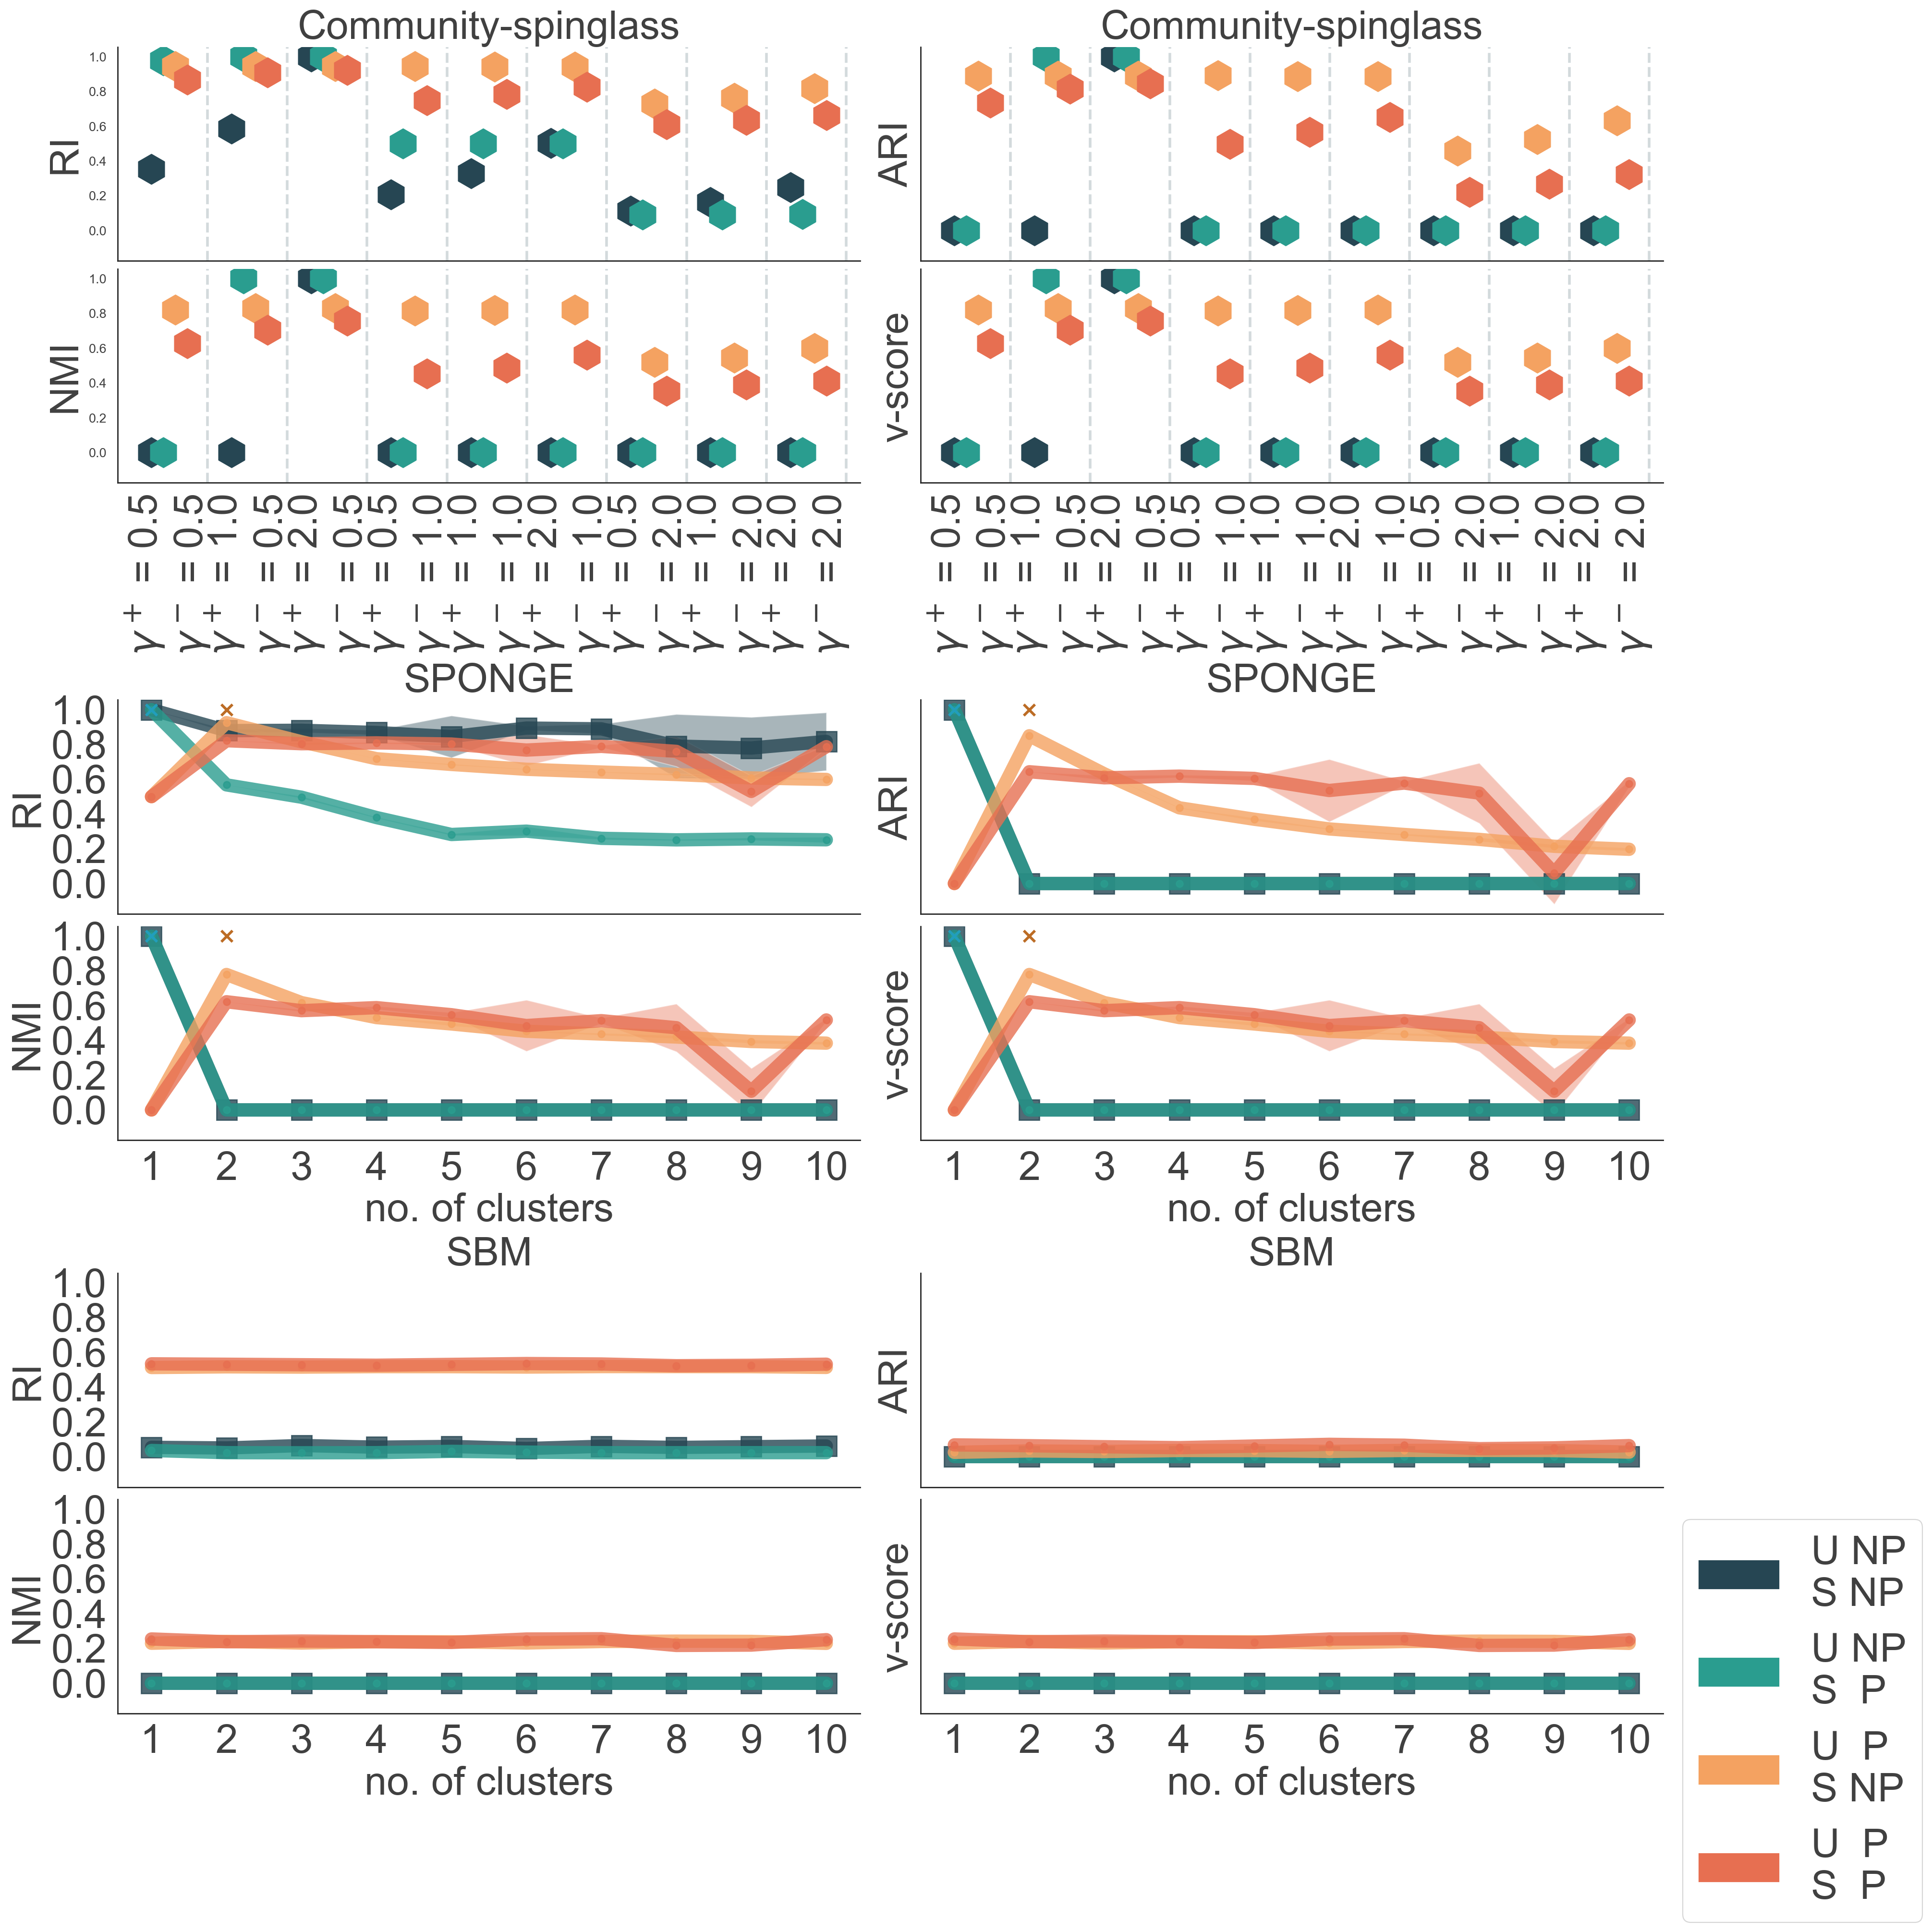

In [7]:
gammas = [0.5, 1, 2]
lambdas = [0.5, 1, 2]

mats, labels = load_data('./data/meneame/synth/deg_corr/')
fig, axs = plt.subplots(6, 2, figsize = (20,20),dpi =200, sharey=True, constrained_layout=True)


j = 0
for m, ax in zip(measures+measures+measures, axs.ravel()):
    if j < 4:
        dfs = rand_score_df(method='spinglass',dataset='meneame',mats= mats, labels=labels,scenarios=deg_corr_scenarios,synth=True, metrics=m)

        if j == 0 or j == 1:  
            ax.set_title(f'Community-spinglass', size = text_size)
            plot_spinglass_synth(ax, dfs[::2], lambdas, gammas, titles, text_size, xticks = False)
        else:
            plot_spinglass_synth(ax, dfs[::2], lambdas, gammas, titles, text_size, xticks = True)
        ax.set_ylabel((measures_labels*3)[j], size =text_size)
        j+=1
    elif j >= 4  and  j <8:
        df, df_std = rand_score_df(method='sponge',dataset='meneame',mats= mats, scenarios=deg_corr_scenarios,labels=labels,synth=True, metrics=m)
        if j == 4 or j == 5:
            ax.set_title(f'SPONGE', size = text_size)
            plot_sponge_synth(ax, df, df_std, text_size, titles, xticks=False)
        else:
            plot_sponge_synth(ax, df, df_std, text_size, titles, xticks=True)
        ax.set_ylabel((measures_labels*3)[j], fontsize =text_size)
        j+=1
    elif j >= 8  and  j <12:
        df = rand_score_df(method='sbm',dataset='meneame',mats= mats, scenarios=deg_corr_scenarios,labels=labels,synth=True, metrics=m)
        if j == 8 or j == 9:
            ax.set_title(f'SBM', size = text_size)
            plot_sbm_synth(ax, df, text_size, titles, xticks=False)
        else:
            plot_sbm_synth(ax, df, text_size, titles, xticks=True)
        ax.set_ylabel((measures_labels*3)[j], fontsize =text_size)
        j+=1


save_plot(path = './plots/uniform/', filename = 'metrics_comparison.pdf')
plt.show()

## Real data

In [8]:
with bz2.BZ2File(f'./data/meneame/real-data/adj_data.pkl', 'r') as f:
    A = pickle.load(f)

membership_df = pd.DataFrame()

### Spinglass

In [9]:
gammas = [0.5, 1]
lambdas = [0.5, 1]

In [10]:
import pandas as pd

# Initialize an empty dictionary to store the counts
counts_dict = {}

for gamma in gammas:
    for lambd in lambdas:
        folder = get_folder('meneame',synth = False,scenario= 'u_np_s_np',method='spinglass',weighted=False,year=0)
        with open(f'{folder}gamma_{gamma}_lambda_{lambd}_run_0.pickle', 'rb') as f:
            spinglass = pickle.load(f)
        g = network(A, scenario='real-data', labels=spinglass)
        membership_df[f'spinglass ({gamma},{lambd})'] = g.vs['labels']
        labels, counts = np.unique(spinglass, return_counts=True)

        # Create a dictionary for the current combination of gamma and lambd
        current_counts = dict(zip(labels, counts))

        # Add the current counts to the overall counts dictionary
        counts_dict[(gamma, lambd)] = current_counts

# Convert the counts dictionary to a DataFrame
df = pd.DataFrame(counts_dict).T

# Set the column names
df.columns = [f'comm. {label}' for label in df.columns]

# Set the index names
df.index.names = ['$\gamma^+$', '$\gamma^-$']

# Replace NaN values with zeros
df = df.fillna(0)

df = df.astype(int)
df = pd.DataFrame(np.sort(df)[:, ::-1], index=df.index, columns=df.columns)

display(df)


comm. 0  comm. 1  comm. 2  comm. 3  comm. 4  comm. 5  \
$\gamma^+$ $\gamma^-$                                                         
0.5        0.5           10629      978        8        5        1        1   
           1.0           10756      858        8        2        1        1   
1.0        0.5            6166     2902     2323      121       39       28   
           1.0            6059     3002     2530       13        9        6   

                       comm. 6  comm. 7  comm. 8  comm. 9  comm. 10  comm. 11  \
$\gamma^+$ $\gamma^-$                                                           
0.5        0.5               1        1        1        1         1         1   
           1.0               1        1        0        0         0         0   
1.0        0.5              17       10        6        3         3         2   
           1.0               3        2        2        1         1         0   

                       comm. 12  comm. 13  comm. 14  comm. 15  comm. 16  \
$\gamma^+$ $\gamma^-$                                                     
0.5        0.5                0         0         0         0         0   
           1.0                0         0         0         0         0   
1.0        0.5                2         1         1         1         1   
           1.0                0         0         0         0         0   

                       comm. 17  comm. 18  
$\gamma^+$ $\gamma^-$                      
0.5        0.5                0         0  
           1.0                0         0  
1.0        0.5                1         1  
           1.0                0         0

### SPONGE

In [17]:

# Initialize an empty dictionary to store the counts
counts_dict = {}

for k in range(10):
    folder = get_folder('meneame',synth = False,scenario= 'u_np_s_np',method='sponge',weighted=True,year=0)
    with open(f'{folder}{k+1}_run_{1}.pickle', 'rb') as f:
        sponge = pickle.load(f)
    labels, counts = np.unique(sponge, return_counts=True)
    g = network(A, scenario='real-data', labels=sponge)
    membership_df[f'sponge (k = {k+1})'] = g.vs['labels']
    # Create a dictionary for the current combination of gamma and lambd
    current_counts = dict(zip(labels, counts))

    # Add the current counts to the overall counts dictionary
    counts_dict[k] = current_counts

# Convert the counts dictionary to a DataFrame
df = pd.DataFrame(counts_dict).T

# Set the column names
df.columns = [f'{label}' for label in df.columns]

# Set the index names
df.index.names = ['k']

# Replace NaN values with zeros
df = df.fillna(0)

df = df.astype(int)
df = pd.DataFrame(np.sort(df)[:, ::-1], index=df.index, columns=df.columns)

df

0     1    2   3   4   5   6  7  8  9
k                                           
0  11628     0    0   0   0   0   0  0  0  0
1  11591    37    0   0   0   0   0  0  0  0
2  11583    37    8   0   0   0   0  0  0  0
3   7087  4496   37   8   0   0   0  0  0  0
4   7172  4410   25  13   8   0   0  0  0  0
5   7247  4325   25  13  10   8   0  0  0  0
6   7436  3471  665  25  13  10   8  0  0  0
7   7401  3453  708  25  13  10  10  8  0  0
8   7412  3459  687  25  13  10  10  8  4  0
9   7417  3450  683  25  13  10  10  8  8  4

In [18]:
from sklearn.preprocessing import LabelEncoder

# Define the path to the data directory
path = './data/meneame/real-data/'

# Read votes data from a compressed file
df = pd.read_csv(path + 'df_stories_votes.tsv.gz', sep="\t", compression="gzip").drop_duplicates().reset_index(drop=True)

# Numerical encoding for 'story_id' and 'username_vote'
df["story_index"] = LabelEncoder().fit_transform(df["story_id"])
df["username_index"] = LabelEncoder().fit_transform(df["username_vote"])

In [19]:
df = df.sort_values(by=['username_index'])

In [20]:
# dict with username_index as key and username_vote as value
username_index_dict = dict(zip(df.username_index, df.username_vote))
 #add username_vote to the membership_df
membership_df['username_vote'] = [username_index_dict[i] for i in range(len(username_index_dict))]
membership_df.to_csv('./results/meneame/real-data/membership_df.csv', index=False)

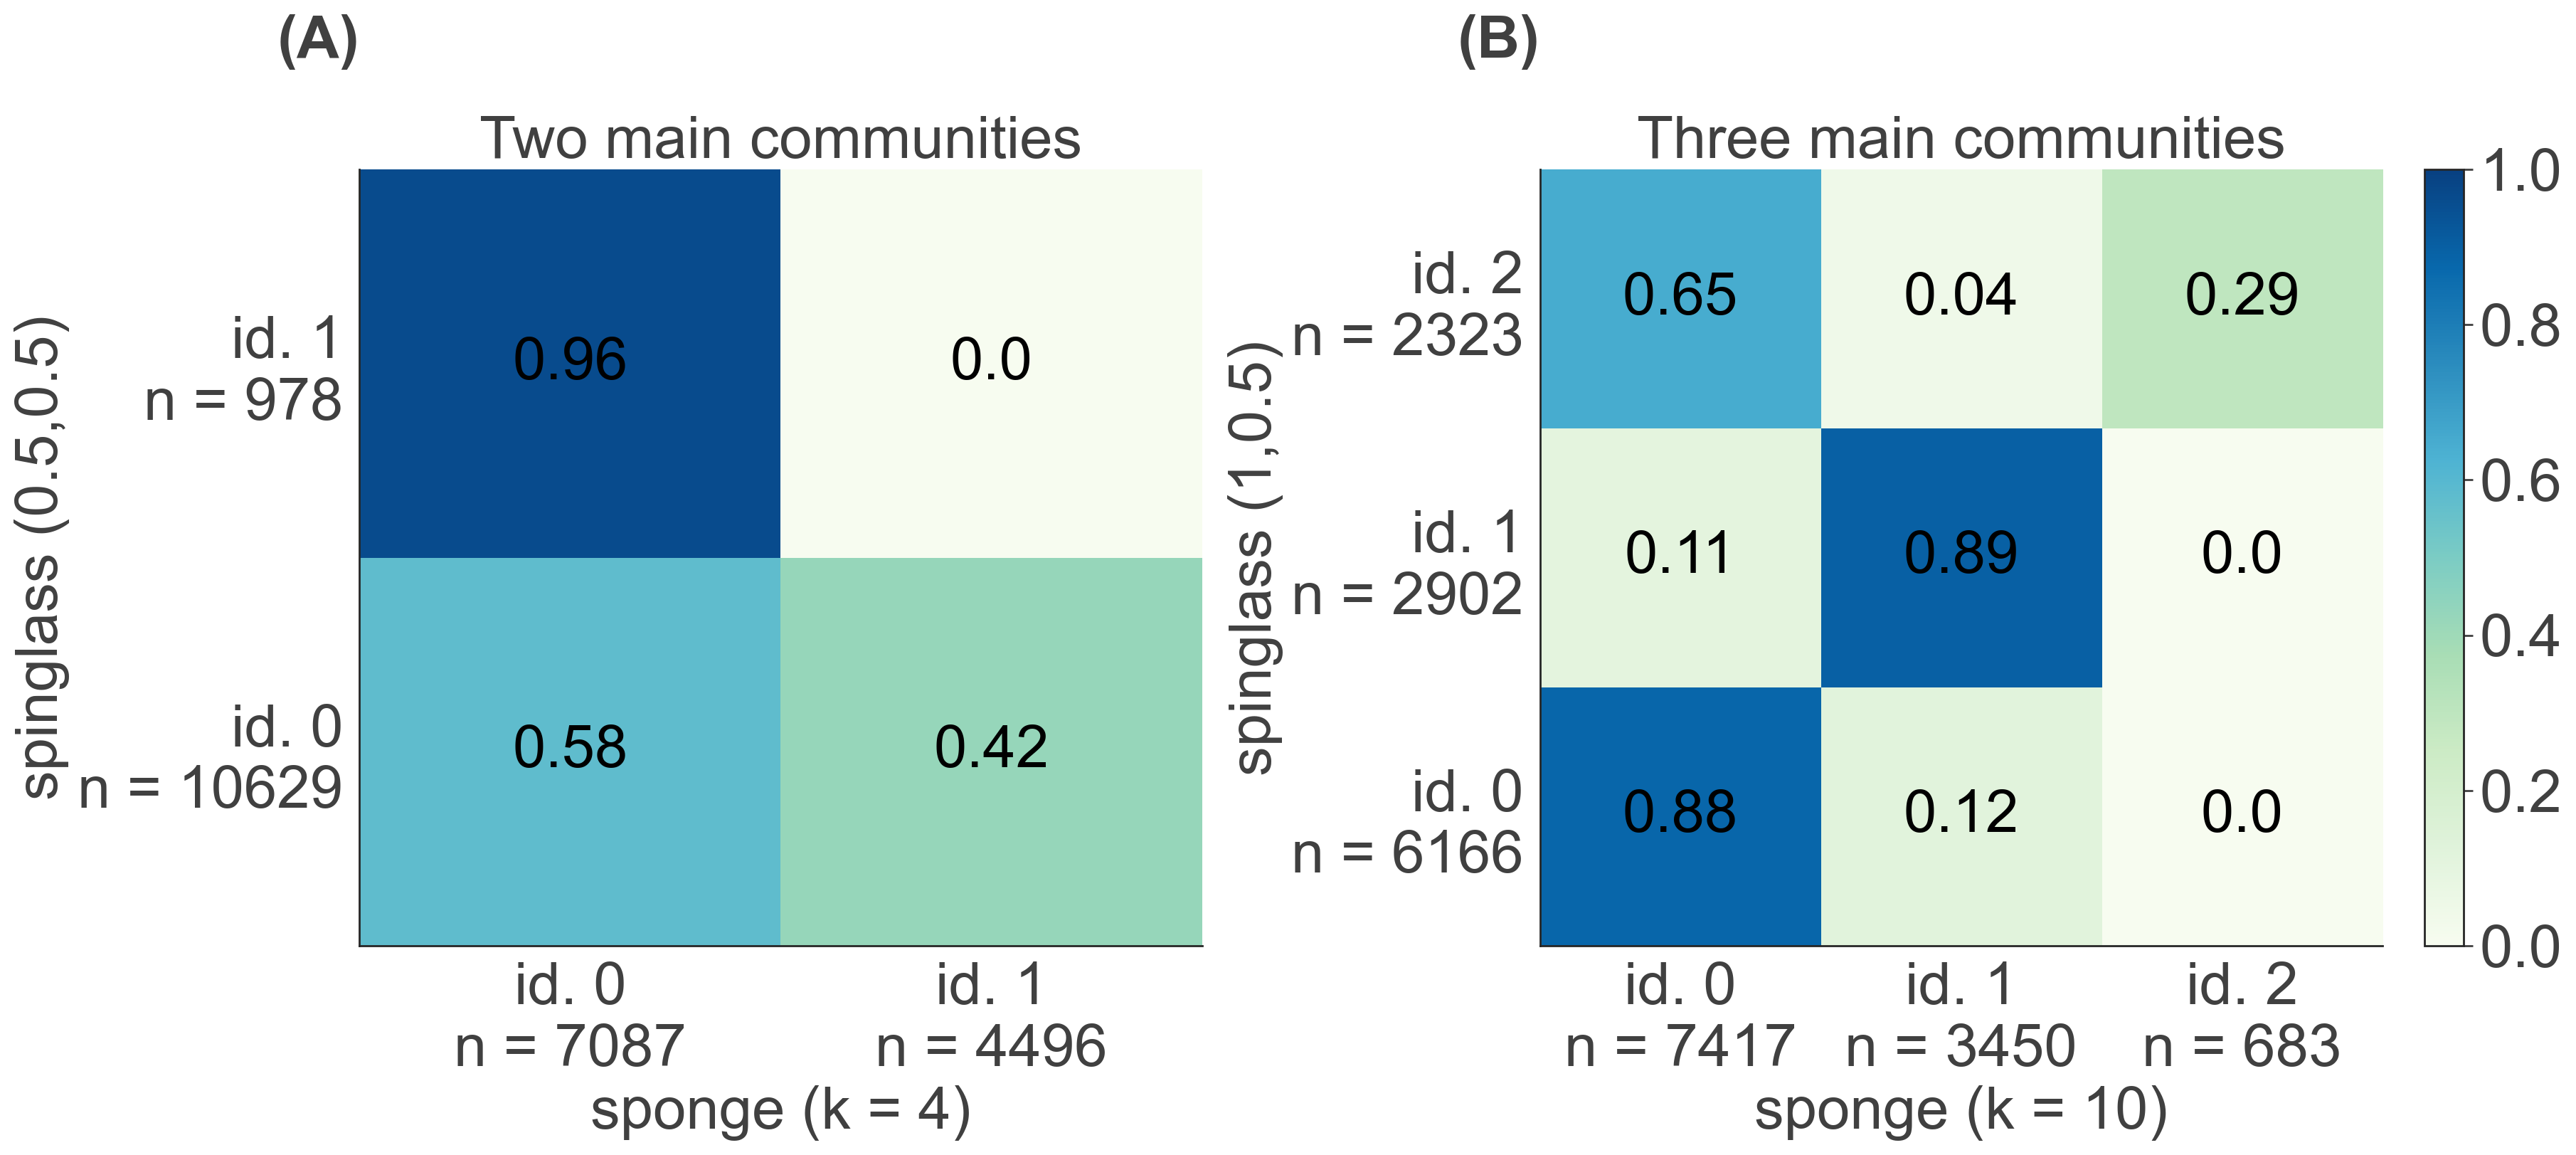

: 

In [92]:
# Define panel letters
panel_labels = ['(A)', '(B)']
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,8), dpi=200, constrained_layout=True)
# Add panel letters to subplots
for i, ax in enumerate([ax1,ax2]):
    ax.text(0, 1.2, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')



plots = {ax1: ('spinglass (0.5,0.5)', 'sponge (k = 4)'), ax2: ('spinglass (1,0.5)', 'sponge (k = 10)')}

ax1.set_title('Two main communities', size=text_size)
ax2.set_title('Three main communities', size=text_size)
for ax in [ax1, ax2]:
#for col1 in ['spinglass (0.5,0.5)', 'spinglass (1,0.5)']:
#    for col2 in ['sponge (k = 4)', 'sponge (k = 7)']:
        # Sort the index and columns by community size
    col1, col2 = plots[ax]
    index_order = membership_df[col1].value_counts().index
    columns_order = membership_df[col2].value_counts().index
    crosstab = pd.crosstab(membership_df[col1], membership_df[col2], normalize='index').loc[index_order, columns_order]

    crosstab.index = list(range(len(crosstab.index)))
    crosstab.columns = list(range(len(crosstab.columns)))
    if ax == ax1:
        crosstab = crosstab.iloc[:2, :2]
    else:
        crosstab = crosstab.iloc[:3, :3]

    im = ax.imshow(crosstab, cmap='GnBu', aspect='auto', vmin=0, vmax=1)
    # Add the values to the plot
    for i in range(len(crosstab.index)):
        for j in range(len(crosstab.columns)):
            
            if crosstab.iloc[i, j] == 1 :
                ax.text(j, i, 1, ha='center', va='center', color='black', size=text_size)
            else:
                ax.text(j, i, round(crosstab.iloc[i, j], 2), ha='center', va='center', color='black', size = text_size)
        # Get the size of each community and add it to the xtick and ytick labels
    community_sizes_col1 = membership_df[col1].value_counts().sort_values(ascending=False).tolist()
    community_sizes_col2 = membership_df[col2].value_counts().sort_values(ascending=False).tolist()
    xticklabels = [f'id. {label}\nn = {community_sizes_col2[label]}' for label in crosstab.columns]
    yticklabels = [f'id. {label}\nn = {community_sizes_col1[label]}' for label in crosstab.index]
    ax.set_xticks(range(len(crosstab.columns)))
    ax.set_xticklabels(xticklabels, size=text_size)
    ax.set_yticks(range(len(crosstab.index)))
    ax.set_yticklabels(yticklabels, size = text_size)     

    #ax.set_title(f'{col1} vs {col2}')
    #ax.set_xticks(range(len(crosstab.columns)), crosstab.columns)
    #ax.set_yticks(range(len(crosstab.index)), crosstab.index)
    ax.set_xlabel(col2, size = text_size)
    ax.set_ylabel(col1, size=text_size)
    ax.invert_yaxis()  # Invert the y-axis
    if ax == ax2:
        cbar = plt.colorbar(im)
        cbar.ax.tick_params(labelsize=text_size)
save_plot(path = './plots/comm-comparison/', filename = f'comm_comparison.pdf')

        
plt.show()

# House of Representatives

## Synthetic networks

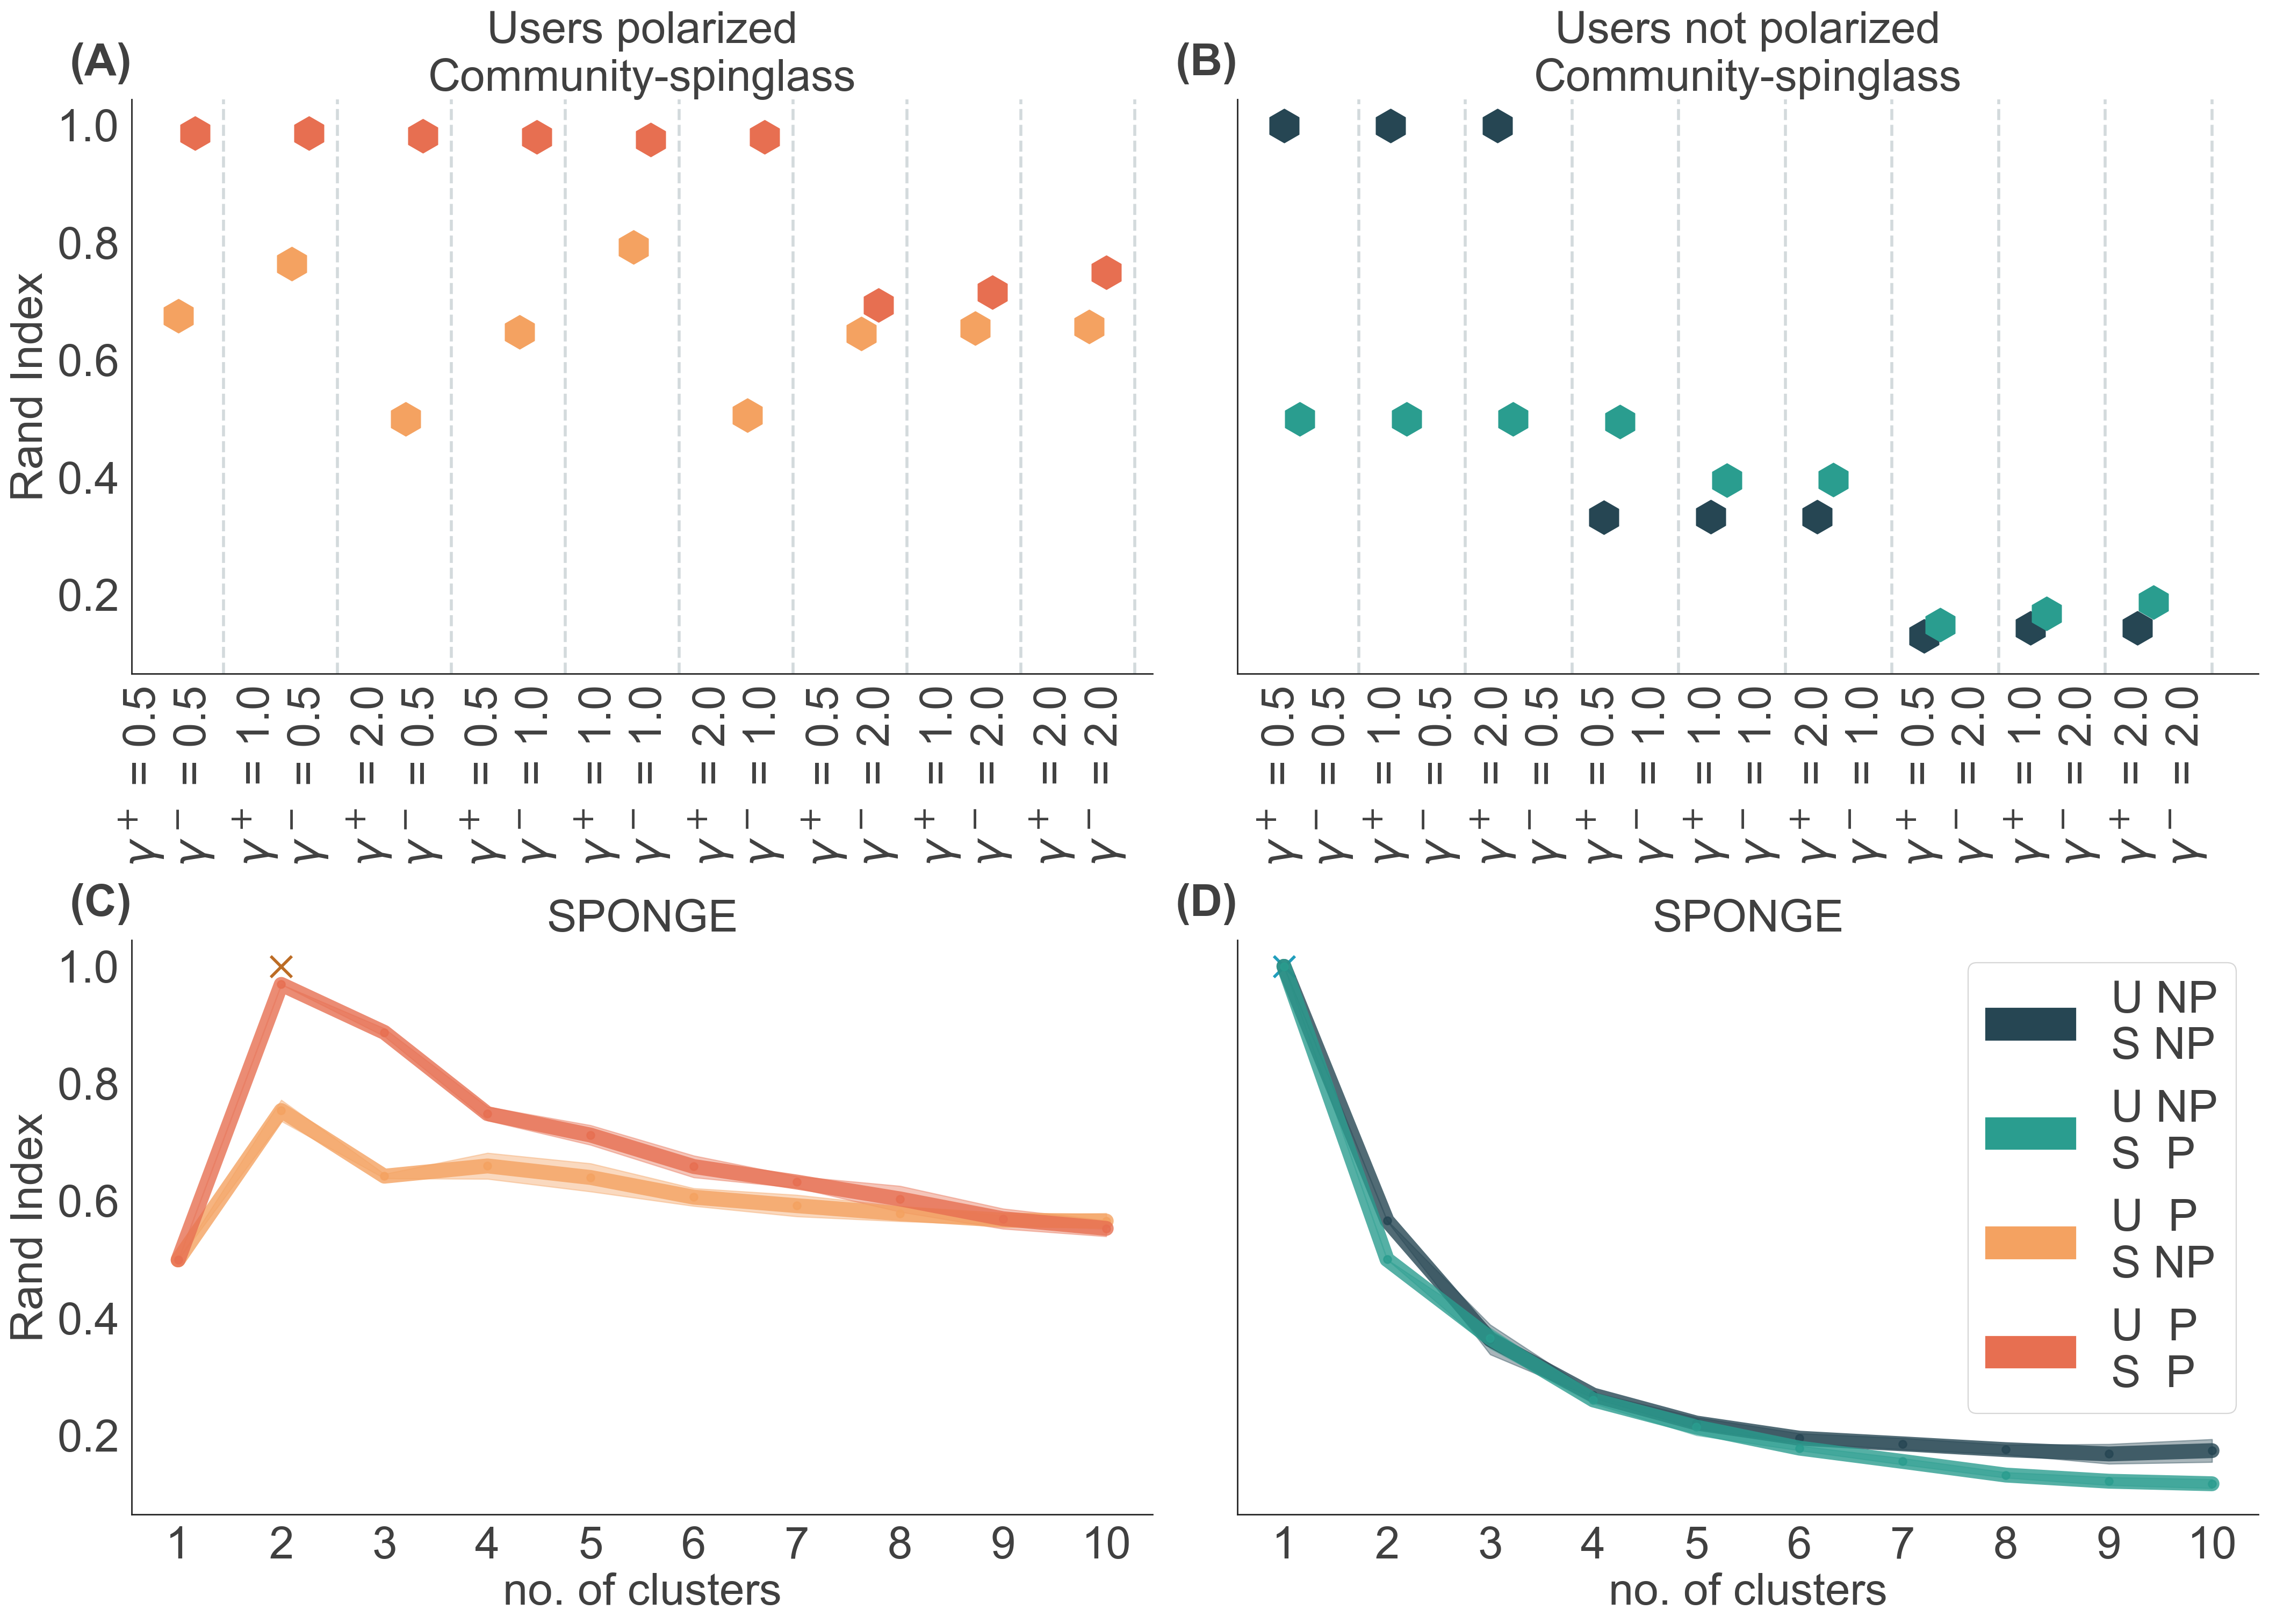

In [145]:
gammas = [0.5, 1, 2]
lambdas = [0.5, 1, 2]

year = 2019

mats, labels = load_data(f'./data/us-house/synth/{year}/uniform/')
fig, axes = plt.subplots(2, 2, figsize = (21,15), dpi = 200, sharey=True, constrained_layout=True)
ax1, ax2, ax3, ax4 = axes.flatten()



# Define panel letters
panel_labels = ['(A)', '(B)', '(C)', '(D)']

# Add panel letters to subplots
for i, ax in enumerate([ax1, ax2, ax3, ax4]):
    ax.text(0, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')


dfs = rand_score_df(method='spinglass',dataset='us-house',mats= mats, labels=labels, scenarios=scenarios,year=year, synth=True, metrics='rand')

ax1.set_title(f'Users polarized\nCommunity-spinglass', size = text_size)     
ax2.set_title(f'Users not polarized\nCommunity-spinglass', size = text_size)

plot_spinglass_synth_split(ax2,ax1, dfs[::2], lambdas, gammas, titles, text_size, xticks = True)

ax1.set_ylabel('Rand Index', size =text_size)


df, df_std = rand_score_df(method='sponge',dataset='us-house',mats= mats, labels=labels, scenarios=scenarios,year=year, synth=True, metrics='rand')

ax3.set_title(f'SPONGE', size = text_size)
ax4.set_title(f'SPONGE', size = text_size)
plot_sponge_synth_split(ax4,ax3, df, df_std, text_size, titles, xticks=True)

ax3.set_ylabel('Rand Index', size =text_size)

save_plot(path = './plots/uniform/us-house/', filename = 'metrics_comparison_red.pdf')
plt.show()

## Real Data

In [146]:
# Load matrices
path_adj = f'./data/us-house/real-data/adj/'

path_labels = f'./data/us-house/real-data/label/'
years = np.arange(1990,2023)

mats = [pickle.load(open(path_adj + f, 'rb')) for f in [f'{year}.pkl' for year in years]]
labels = [pickle.load(open(path_labels + f, 'rb')) for f in [f'{year}.pkl' for year in years]]
scenarios = list(np.arange(1990,2023))
titles = [str(x) for x in np.arange(1990,2023)]

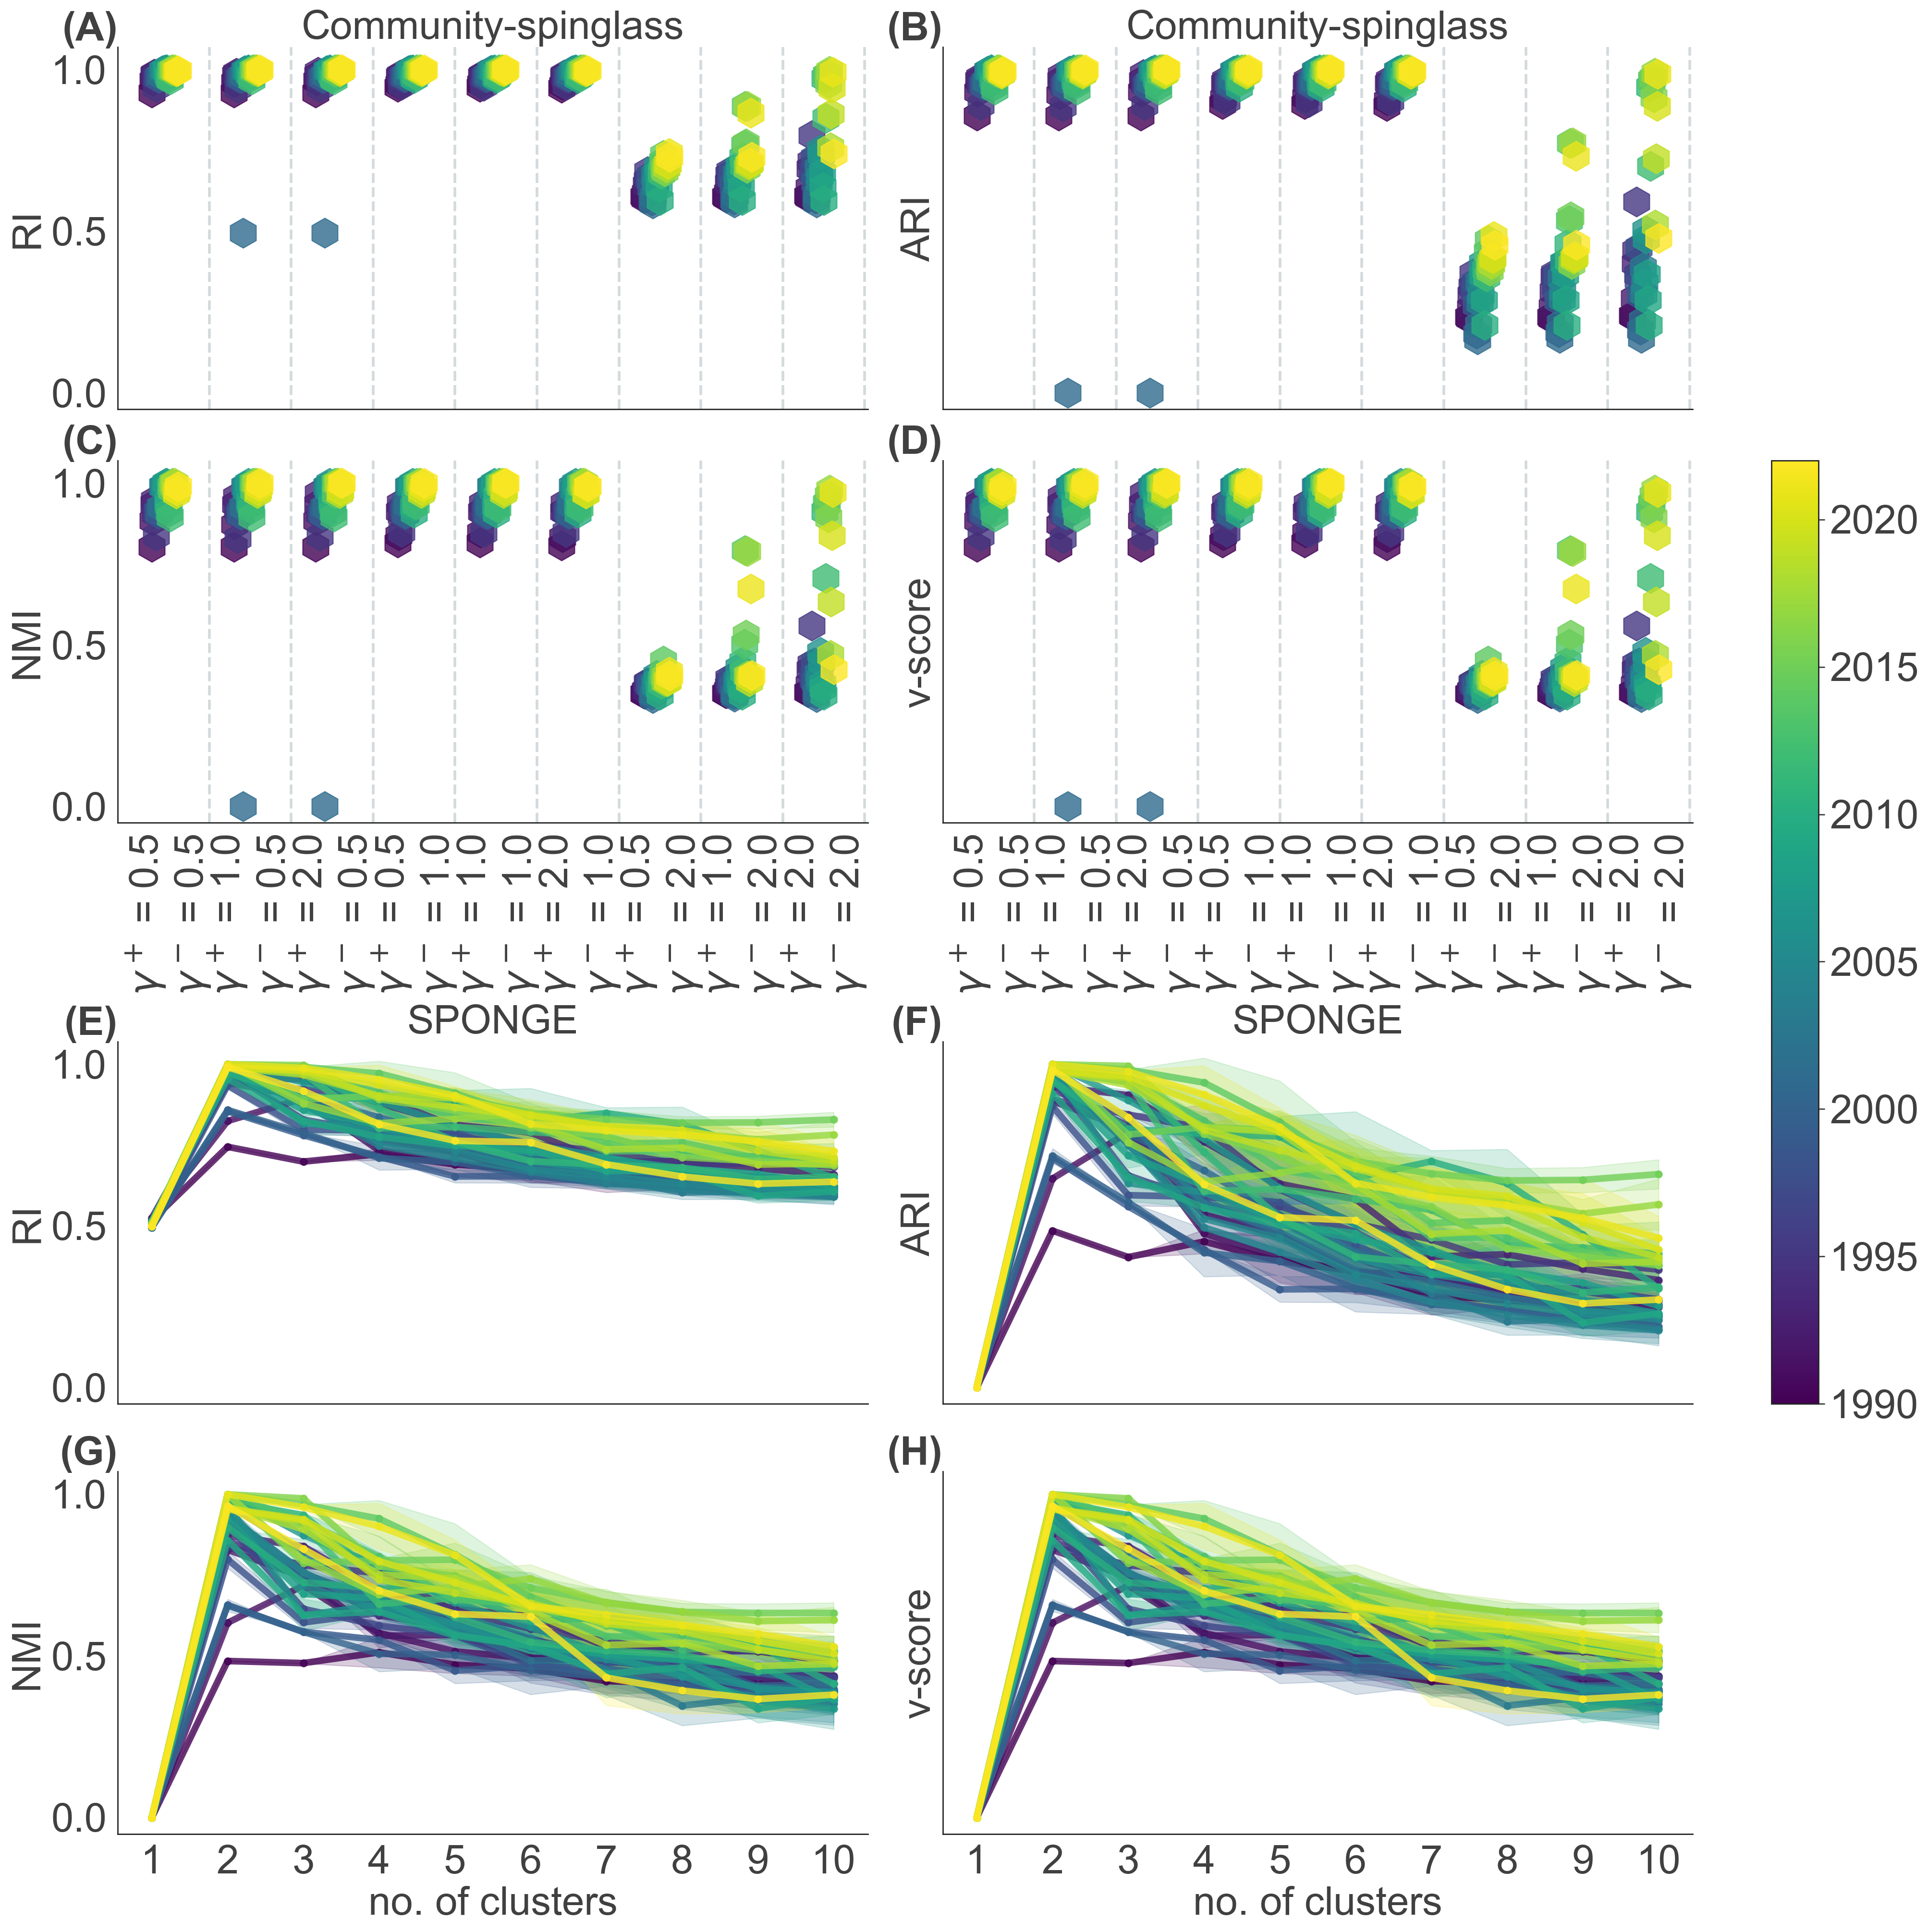

: 

In [147]:
# Create a ScalarMappable object with the same colormap and normalization
sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=mcolors.Normalize(vmin=min(years), vmax=max(years)))
sm.set_array([])  # You can set a dummy array

fig, axs = plt.subplots(4, 2, figsize = (20,20),dpi =200, sharey=True, constrained_layout=True)

# Define panel letters
panel_labels = ['(A)', '(B)', '(C)', '(D)', '(E)', '(F)', '(G)', '(H)']

# Add panel letters to subplots
for i, ax in enumerate(axs.ravel()):
    ax.text(0, 1.1, panel_labels[i], transform=ax.transAxes, fontsize=text_size, fontweight='bold', va='top', ha='right')

j = 0
for m, ax in zip(measures*3, axs.ravel()):

    if j < 4:
        dfs = rand_score_df(method='spinglass',dataset='us-house',mats= mats, labels=labels, titles=titles, scenarios=scenarios, year=scenarios,synth=False, metrics=m)
        weighted_dfs = dfs[::2]
        unweighted_dfs = dfs[1::2]

        # Generate a Viridis palette with 33 colors
        colors = cm.viridis(np.linspace(0, 1, 33))

        # Map years to colors
        year_to_color = {year: color for year, color in zip(sorted(years), colors)}

        x = 0
        ticks = []
        for lambd in lambdas:
            for gamma in gammas:
                delta = 0

                for i, df in enumerate(weighted_dfs):
                    # Get the color for the current year
                    color = year_to_color[years[i]]
                    ax.scatter(x+delta, df.at[gamma, lambd], s = 500, marker = 'h', color=color, alpha = 0.8)
                    delta += 0.01

                ticks.append(f'$\gamma^+$ = {gamma:.1f}\n$\gamma^-$ = {lambd:.1f}')
                ax.axvline(x+0.7, ls='--', alpha =0.2)
                x +=1
        if j == 0 or j == 1:
            ax.set_title(f'Community-spinglass', size = text_size)
            ax.set_xticks([])
        else:
            ax.set_xticks([i+0.2 for i in range(x)],ticks, fontsize=text_size, rotation =90)

        ax.tick_params(axis='y', labelsize=text_size)
        ax.set_ylabel((measures_labels*3)[j], size =text_size)

    elif j >= 4 and j < 8:
        df, df_std = rand_score_df(method='sponge',dataset='us-house',mats= mats, scenarios=scenarios,year=scenarios,labels=labels,synth=False, titles=titles,metrics=m)
        x = df.T.index.tolist()
        mean = df.T.values.tolist()
        std = df_std.T.values.tolist()

        # Map labels to colors
        label_to_color = {label: color for label, color in zip(df.T.columns, colors)}

        for label, m, s in zip(df.T.columns, np.array(mean).T, np.array(std).T):
            m = np.array(m)
            s = np.array(s)
            # Use the color for the current label
            color = label_to_color[label]
            ax.plot(x, m, label=label, marker='o', markersize=5, linestyle='-', linewidth=5, color=color,  alpha = 0.8)
            ax.fill_between(x, m-s, m+s, alpha=0.2, color=color, interpolate=True)
        
        if j == 4 or j == 5:
            ax.set_title(f'SPONGE', size = text_size)
            ax.set_xticks([])
        else:
            ax.set_xlabel('no. of clusters', fontsize =text_size)
            ax.set_xticks(x, x, fontsize=text_size)

        #ax.scatter(x = 1, y = 1, s = 70, marker = 'x', c = '#219ebc', zorder=3, label = 'exp. value\nusers pol.')
        #ax.scatter(x = 2, y = 1, s = 70, marker = 'x', c = '#bc6c25', zorder=3, label = 'exp. value\nusers not pol.')

        ax.set_ylabel((measures_labels*3)[j], fontsize =text_size)
        ax.tick_params(axis='both', labelsize=text_size)
    
        #ax.scatter(x = 1, y = 1, s = 70, marker = 'x', c = '#219ebc', zorder=3, label = 'exp. value\nusers pol.')
    j+=1

# Add the colorbar to the figure
cbar = fig.colorbar(sm,  ax=axs.ravel().tolist()[2:5])
cbar.ax.tick_params(labelsize=text_size)  # Set the tick size

save_plot(path = './plots/us-house/', filename = 'metrics_comparison.pdf')
plt.show()